EXP2: K(10)-Fold Cross Validation.

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

Loading the dataset.

In [4]:
dataset = pd.read_csv('../Dataset/dataset_B_05_2020.csv')

Extracting X and Y from the Dataset.

In [5]:
X = dataset.drop('url', axis = 1).drop('status', axis = 1)
Y = [1 if i == 'legitimate' else 0 for i in dataset['status']]

Splitting the dataset into Training data and Validation data(Test Data).

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

Scaling the data

In [7]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

Defining a common training funtion for diffferent models.

Returns the fitted Model Accuracy and Train Time. 

In [8]:
def training(model, x_train, y_train, x_test, y_test):
    tic = time.time()
    model.fit(x_train, y_train)
    toc = time.time()
    train_time = toc - tic
    y_pred = model.predict(x_test)
    accuracy = np.round(accuracy_score(y_test, y_pred), 4)
    return [model, accuracy, train_time]

Returns the Time taken, Accuracy, Macro f1 score, Recall and Log loss of the trained model.

In [9]:
def validation(model, x_test, y_test):
    y_pred = model[0].predict(x_test)
    accuracy = np.round(accuracy_score(y_test, y_pred), 4)
    macro_f1 = np.round(f1_score(y_test, y_pred), 4)
    recall = np.round(recall_score(y_test, y_pred), 4)
    logl = np.round(log_loss(y_test, y_pred), 4)
    print(f'Train Size = {len(y_train)}, Test Size = {len(y_test)}')
    print(f'Time taken = {model[2]}')
    print(f'Accuracy = {accuracy}')
    print(f'Macro F1 Score = {macro_f1}')
    print(f'Recall = {recall}')
    print(f'Log Loss = {logl}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_estimator(model[0],x_test,y_test)
    plt.show()
    return [model, model[2], accuracy, macro_f1, recall, logl]

model_comp = {}

Spliting the training data using KFold

In [10]:
kf = KFold(n_splits = 10)

Model 1: Support Vector Classification.

In [11]:
def svm(x_train, y_train, x_test, y_test): 
    svm_model = SVC()
    return training(svm_model, x_train, y_train, x_test, y_test)

#Stores the trained model from each cross-validation fold
svm_scores = []
for train_index, test_index in kf.split(x_train_sc):
    x_tr, y_tr, x_te, y_te = [x_train_sc[index] for index in train_index], [y_train[index] for index in train_index], \
                              [x_train_sc[index] for index in test_index], [y_train[index] for index in test_index]
    svm_scores.append(svm(x_tr, y_tr, x_te, y_te))

scores = [i[1] for i in svm_scores]
print(scores)
avg_scores = np.round(np.mean(scores), 4)
var_scores = np.round(np.var(scores), 5)
print(f'Average Score: {avg_scores}')
print(f'variance: {var_scores}')

[0.9501, 0.9462, 0.9512, 0.9475, 0.9512, 0.9588, 0.9612, 0.9488, 0.9625, 0.955]
Average Score: 0.9532
variance: 3e-05


Train Size = 8001, Test Size = 3429
Time taken = 1.2362384796142578
Accuracy = 0.9598
Macro F1 Score = 0.9601
Recall = 0.959
Log Loss = 1.4506
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1697
           1       0.96      0.96      0.96      1732

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429

Confusion Matrix:


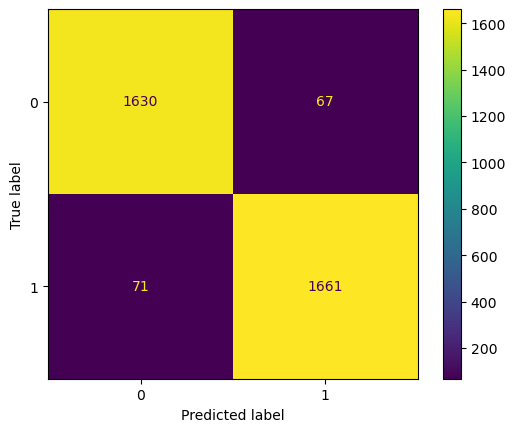

In [12]:
#Validates the model with the best accuracy against the test set
model = []
max_acc = -math.inf
for i in svm_scores:
    if i[1] > max_acc:
        max_acc = i[1]
        model = i
model_comp['svm'] = [*validation(model, x_test_sc, y_test), avg_scores, var_scores]

Model 2: Logistic Reggression Classifier.

In [13]:
def logistic_regression(x_train, y_train, x_test, y_test): 
    logistic_model = LogisticRegression(solver = 'liblinear', max_iter = 1000)
    return training(logistic_model, x_train, y_train, x_test, y_test)

lr_scores = []
for train_index, test_index in kf.split(x_train_sc):
    x_tr, y_tr, x_te, y_te = [x_train_sc[index] for index in train_index], [y_train[index] for index in train_index], \
                              [x_train_sc[index] for index in test_index], [y_train[index] for index in test_index]
    lr_scores.append(logistic_regression(x_tr, y_tr, x_te, y_te))

scores = [i[1] for i in lr_scores]
print(scores)
avg_scores = np.round(np.mean(scores), 4)
var_scores = np.round(np.var(scores), 5)
print(f'Average Score: {avg_scores}')
print(f'variance: {var_scores}')

[0.9338, 0.93, 0.935, 0.9462, 0.935, 0.955, 0.9462, 0.935, 0.9512, 0.9475]
Average Score: 0.9415
variance: 7e-05


Train Size = 8001, Test Size = 3429
Time taken = 0.3304874897003174
Accuracy = 0.9487
Macro F1 Score = 0.9493
Recall = 0.9521
Log Loss = 1.85
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1697
           1       0.95      0.95      0.95      1732

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429

Confusion Matrix:


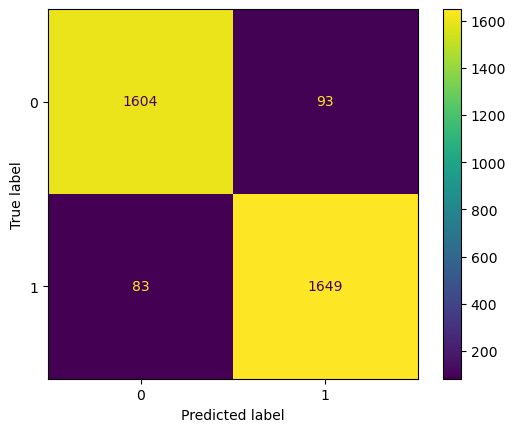

In [14]:
model = []
max_acc = -math.inf
for i in lr_scores:
    if i[1] > max_acc:
        max_acc = i[1]
        model = i
model_comp['logistic_regression'] = [*validation(model, x_test_sc, y_test), avg_scores, var_scores]

Model 3: Decision Tree Classifier.

In [15]:
def decision_tree(x_train, y_train, x_test, y_test): 
    decision_tree_model = DecisionTreeClassifier()
    return training(decision_tree_model, x_train, y_train, x_test, y_test)

dt_scores = []
for train_index, test_index in kf.split(x_train_sc):
    x_tr, y_tr, x_te, y_te = [x_train_sc[index] for index in train_index], [y_train[index] for index in train_index], \
                              [x_train_sc[index] for index in test_index], [y_train[index] for index in test_index]
    dt_scores.append(decision_tree(x_tr, y_tr, x_te, y_te))

scores = [i[1] for i in dt_scores]
print(scores)
avg_scores = np.round(np.mean(scores), 4)
var_scores = np.round(np.var(scores), 5)
print(f'Average Score: {avg_scores}')
print(f'variance: {var_scores}')

[0.9401, 0.9112, 0.95, 0.9125, 0.9175, 0.9338, 0.9412, 0.9362, 0.9325, 0.9388]
Average Score: 0.9314
variance: 0.00016


Train Size = 8001, Test Size = 3429
Time taken = 0.09502410888671875
Accuracy = 0.9338
Macro F1 Score = 0.9346
Recall = 0.9359
Log Loss = 2.3861
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1697
           1       0.93      0.94      0.93      1732

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429

Confusion Matrix:


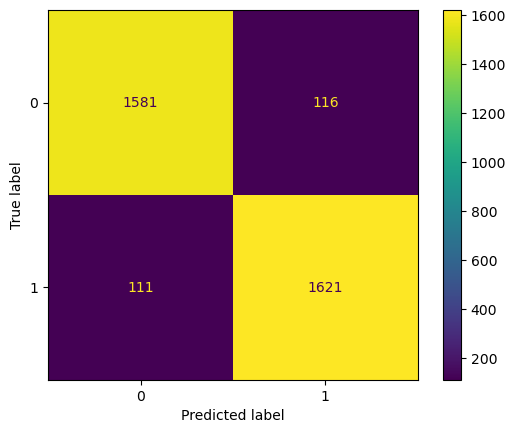

In [16]:
model = []
max_acc = -math.inf
for i in dt_scores:
    if i[1] > max_acc:
        max_acc = i[1]
        model = i
model_comp['decision_tree'] = [*validation(model, x_test_sc, y_test), avg_scores, var_scores]

Model 4: Random Forest Classifier

In [17]:
def random_forest(x_train, y_train, x_test, y_test): 
    random_forest_model = RandomForestClassifier(n_estimators = 150)
    return training(random_forest_model, x_train, y_train, x_test, y_test)

rf_scores = []
for train_index, test_index in kf.split(x_train_sc):
    x_tr, y_tr, x_te, y_te = [x_train_sc[index] for index in train_index], [y_train[index] for index in train_index], \
                              [x_train_sc[index] for index in test_index], [y_train[index] for index in test_index]
    rf_scores.append(random_forest(x_tr, y_tr, x_te, y_te))

scores = [i[1] for i in rf_scores]
print(scores)
avg_scores = np.round(np.mean(scores), 4)
var_scores = np.round(np.var(scores), 5)
print(f'Average Score: {avg_scores}')
print(f'variance: {var_scores}')


[0.9588, 0.9588, 0.9612, 0.9638, 0.9638, 0.975, 0.9688, 0.9638, 0.9575, 0.965]
Average Score: 0.9636
variance: 2e-05


Train Size = 8001, Test Size = 3429
Time taken = 1.1867139339447021
Accuracy = 0.9673
Macro F1 Score = 0.9677
Recall = 0.9682
Log Loss = 1.1773
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1697
           1       0.97      0.97      0.97      1732

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429

Confusion Matrix:


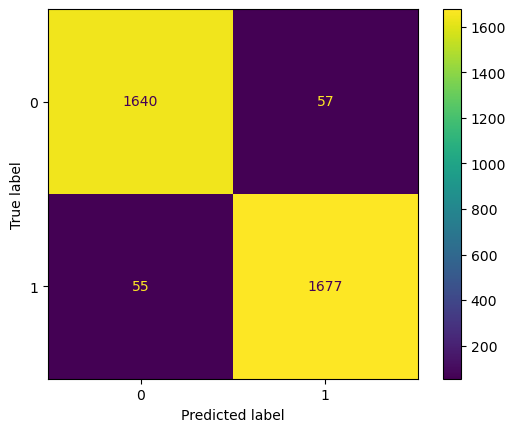

In [18]:
model = []
max_acc = -math.inf
for i in rf_scores:
    if i[1] > max_acc:
        max_acc = i[1]
        model = i
model_comp['random_forest'] = [*validation(model, x_test_sc, y_test), avg_scores, var_scores]

Model Comparison

In [19]:
plots = ['Time Taken', 'Accuracy', 'Macro F1 Score', 'Recall', 'Log Loss', 'Average Accuracy', 'Variance']
model_values = [i[1:] for i in model_comp.values()]
comp = pd.DataFrame(model_values, index = list(model_comp.keys()), columns = plots)
display(comp)

,Time Taken,Accuracy,Macro F1 Score,Recall,Log Loss,Average Accuracy,Variance
svm,1.236238,0.9598,0.9601,0.9590,1.4506,0.9532,0.00003
logistic_regression,0.330487,0.9487,0.9493,0.9521,1.8500,0.9415,0.00007
decision_tree,0.095024,0.9338,0.9346,0.9359,2.3861,0.9314,0.00016
random_forest,1.186714,0.9673,0.9677,0.9682,1.1773,0.9636,0.00002


Conclusion:

Average Accuracy: This metric offers a more reliable assessment of models compared to accuracy, as it addresses potential overfitting arising from the specific train-test partitioning.    
Random Forest > Support Vector > Logidtic Regression > Decision Tree

Variance: This metric quantifies the model's sensitivity to variations in the training data, indicating the degree of overfitting resulting from the specific train-test split.     
Decision Tree > Logistic Regression > Support Vector > Random Forest

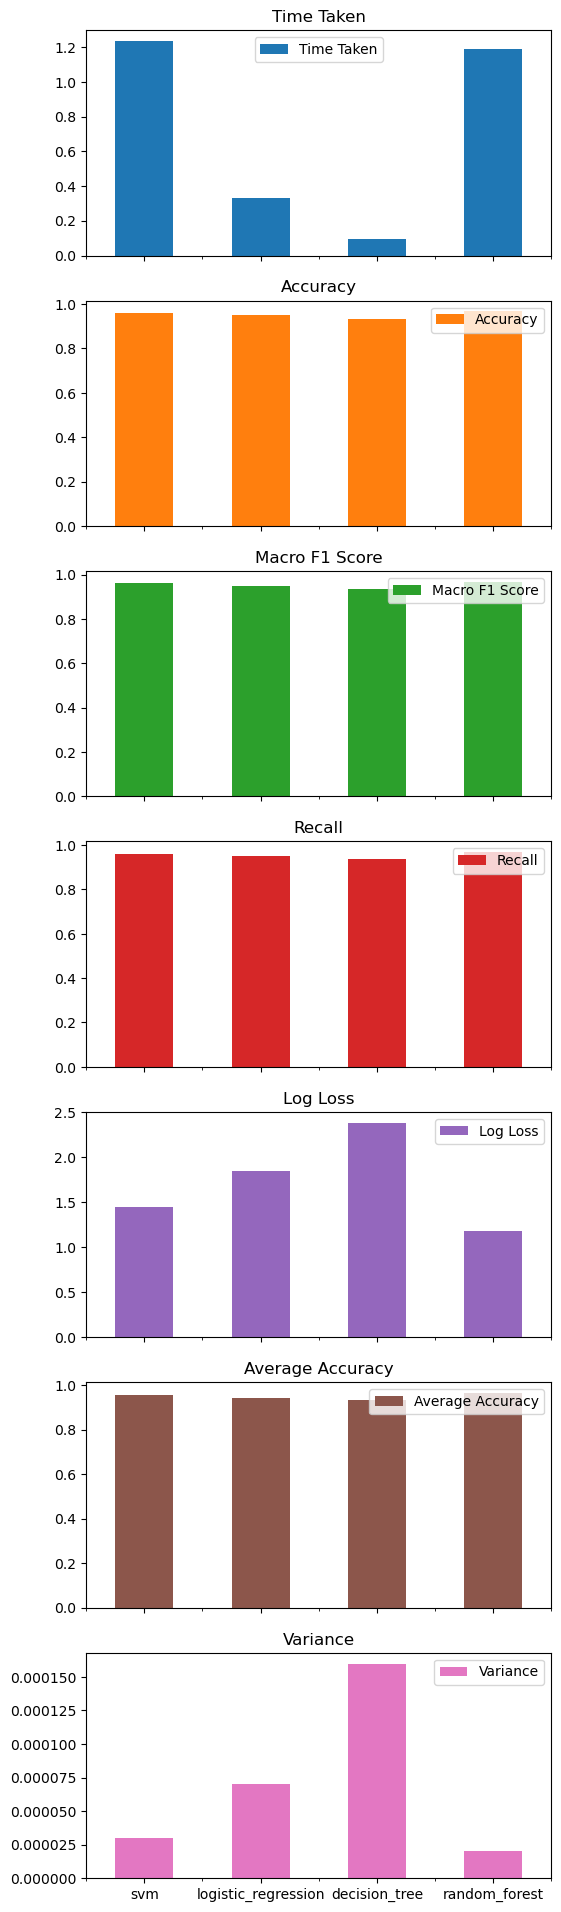

In [20]:
axs = comp.plot.bar(subplots = True, figsize = (6,24), rot = 0)
axs[1].legend()
plt.show()